In [3]:
import os
import requests as req
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline

/home/gr4vy/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [5]:
IRIS_FILE = req.get('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')

In [6]:
with open(os.getcwd() + '/iris.data', 'w') as fw_iris:
    fw_iris.write(IRIS_FILE.text)

In [4]:
IRIS_DF = pd.read_csv(os.getcwd() + '/iris.data', names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])

Text(0.5,1.02,'Setosa Sepal Width vs. Sepal Length')

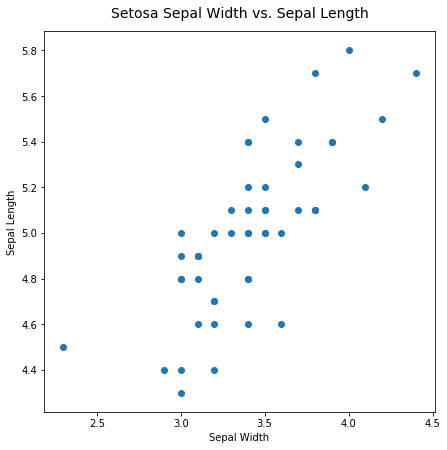

In [5]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(IRIS_DF['sepal width'][:50], IRIS_DF['sepal length'][:50])
ax.set_ylabel('Sepal Length')
ax.set_xlabel('Sepal Width')
ax.set_title('Setosa Sepal Width vs. Sepal Length', fontsize=14, y=1.02)

In [7]:
y = IRIS_DF['sepal length'][:50]
x = IRIS_DF['sepal width'][:50]
X = sm.add_constant(x)
results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           sepal length   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     60.52
Date:                Thu, 21 Dec 2017   Prob (F-statistic):           4.75e-10
Time:                        17:22:55   Log-Likelihood:                 2.0879
No. Observations:                  50   AIC:                           -0.1759
Df Residuals:                      48   BIC:                             3.648
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.6447      0.305      8.660      

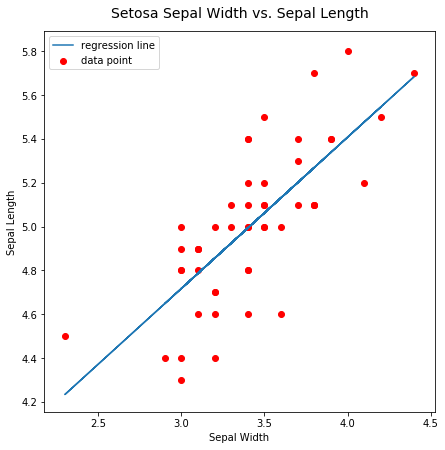

In [8]:
fig, ax = plt.subplots(figsize=(7,7))
ax.plot(x, results.fittedvalues, label='regression line')
ax.scatter(x, y, label='data point', color='r')
ax.set_ylabel('Sepal Length')
ax.set_xlabel('Sepal Width')
ax.set_title('Setosa Sepal Width vs. Sepal Length', fontsize=14,
y=1.02)
ax.legend(loc=2)